In [1]:
### 这个文件尝试了 GEM包中的 图分解算法 一共四个
###
### 导入 networkx 包 以及一个作为例子的图
import networkx as nx

G=nx.karate_club_graph()

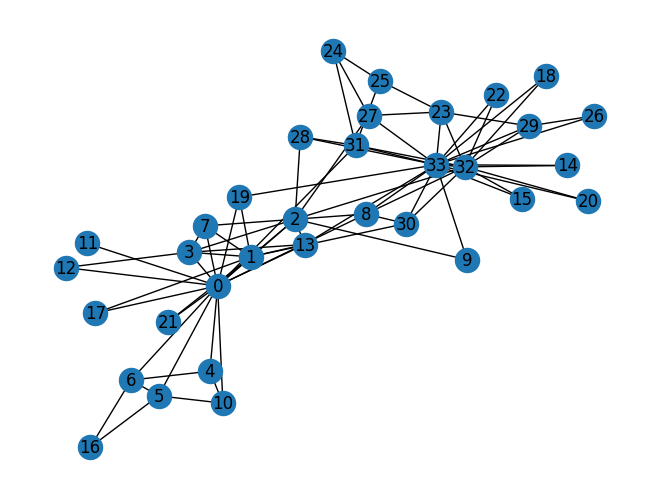

In [2]:
### 画出图来看一看
nx.draw(G, with_labels=True)

In [3]:
#import matplotlib
#import matplotlib.pyplot as plt

### 导入相关包
from gem.embedding.gf import GraphFactorization
from gem.embedding.hope import HOPE
from gem.embedding.lap import LaplacianEigenmaps
from gem.embedding.lle import LocallyLinearEmbedding

In [4]:
### 将G转化为有向图
G = G.to_directed()

In [5]:
%%time
### Graph Factorization 方法 C++
model_gf = GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set = '')
### data_set 是可选参数 用于一个文件的命名 比如在原文件中 是'Karate'

model_gf_embd = model_gf.learn_embedding(graph=G, is_weighted=True, no_python=True)

### Graph Factorization 方法结果
model_gf_embd[:8]

	Iter id: 0
		Objective: 1594.02, f1: 1594.02, f2:0.00646438
	Iter id: 10000
		Objective: 1580.16, f1: 1579.47, f2:0.689037
	Iter id: 20000
		Objective: 1537.06, f1: 1533.43, f2:3.62285
	Iter id: 30000
		Objective: 1509.49, f1: 1503.49, f2:5.99447
	Iter id: 40000
		Objective: 1498.59, f1: 1491.41, f2:7.17823
CPU times: user 46.3 s, sys: 0 ns, total: 46.3 s
Wall time: 46.8 s


array([[ 0.20834157,  0.28328614],
       [ 0.2508606 ,  0.30474039],
       [ 0.23620163,  0.2936976 ],
       [ 0.04487921,  0.05118869],
       [ 0.02752751,  0.05785132],
       [ 0.03467437,  0.11863183],
       [ 0.01223374,  0.06005694],
       [ 0.00403058, -0.00114205]])

In [6]:
%%time
### Graph Factorization 方法 Python
model_gf = GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set = '')
### data_set 是可选参数 用于一个文件的命名 比如在原文件中 是'Karate'

model_gf_embd = model_gf.learn_embedding(graph=G, is_weighted=True, no_python=False)

### Graph Factorization 方法结果
model_gf_embd[:8]

CPU times: user 44.1 s, sys: 349 ms, total: 44.5 s
Wall time: 44.4 s


array([[ 0.20630916,  0.11907279],
       [ 0.23705107,  0.14589636],
       [ 0.22481942,  0.13435528],
       [ 0.05242641,  0.01657094],
       [ 0.03327567,  0.00230732],
       [ 0.03335738,  0.01582629],
       [ 0.00837114,  0.01071428],
       [ 0.00231921, -0.00422872]])

In [7]:
%%time
### HOPE 方法
model_hope = HOPE(d=2, beta=0.01) 
# A higher value of beta places more emphasis on capturing higher-order proximities

model_hope_embd = model_hope.learn_embedding(graph=G, is_weighted=True, no_python=True)

### HOPE 方法结果
model_hope_embd[:8]

SVD error (low rank): 0.345249
CPU times: user 0 ns, sys: 77.9 ms, total: 77.9 ms
Wall time: 2.82 ms


array([[-0.16437405, -0.16437405],
       [-0.1587958 , -0.1587958 ],
       [-0.18975886, -0.18975886],
       [-0.10449548, -0.10449548],
       [-0.0292987 , -0.0292987 ],
       [-0.03548386, -0.03548386],
       [-0.03496821, -0.03496821],
       [-0.09389957, -0.09389957]])

In [8]:
%%time
### Laplacian 方法
model_le = LaplacianEigenmaps(d=2)

model_le_embd = model_le.learn_embedding(graph=G, is_weighted=True, no_python=True)
### 输出Laplacian 方法结果
model_le_embd[:8]

Laplacian matrix recon. error (low rank): 6.303254
CPU times: user 35.7 ms, sys: 214 ms, total: 249 ms
Wall time: 7.4 ms


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


array([[ 0.28814558, -0.11256712],
       [ 0.14084241, -0.34438667],
       [ 0.06725901, -0.27308951],
       [ 0.13436137, -0.31539717],
       [ 0.23229627,  0.16350094],
       [ 0.35714964,  0.35801748],
       [ 0.34138202,  0.33902251],
       [ 0.10452288, -0.2593182 ]])

In [9]:
%%time
### Locally Linear 方法
model_lle = LocallyLinearEmbedding(d=2)

model_lle_embd = model_lle.learn_embedding(graph=G, is_weighted=True, no_python=True)
### 输出 Locally Linear 方法结果
model_lle_embd[:8]

CPU times: user 166 ms, sys: 735 ms, total: 901 ms
Wall time: 26.6 ms


array([[-0.17468994, -0.02181907],
       [ 0.14005714,  0.04971317],
       [ 0.13714224, -0.04746342],
       [-0.13949028,  0.01533642],
       [ 0.19788112,  0.0122718 ],
       [ 0.03105105,  0.00538143],
       [-0.04123454, -0.00490177],
       [ 0.28424185,  0.0323537 ]])

Comparing the above two cells, we see that `no_python` Option is faster...

In [10]:
%%time
### Node2Vec 方法
from gem.embedding.node2vec import node2vec
model_n2v = node2vec(d=2, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1)

model_n2v_embd = model_n2v.learn_embedding(graph=G, is_weighted=False, no_python=True)
### 输出 Locally Linear 方法结果
model_n2v_embd[:8]


An algorithmic framework for representational learning on graphs. [Jun 10 2023]
Input graph path (-i:)=tempGraph.graph
Output graph path (-o:)=tempGraph.emb
Number of dimensions. Default is 128 (-d:)=2
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=YES
Graph is weighted. (-w)=YES
Output random walks instead of embeddings. (-ow)=NO
Read 156 lines from tempGraph.graph
Preprocessing progress: 0.00% 
Walking Progress: 0.00%
Learning Progress: 36.76% 
CPU times: user 382 ms, sys: 1.79 s, total: 2.17 s
Wall time: 371 ms


array([[3.89046, 6.19729],
       [3.6365 , 5.64972],
       [3.79563, 5.5293 ],
       [3.60409, 5.91947],
       [4.01958, 6.54096],
       [4.3501 , 7.25615],
       [4.46088, 7.2457 ],
       [3.44749, 5.7508 ]])

In [11]:
%%time
### SDNE 方法
from gem.embedding.sdne import SDNE
model_sdne = SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3, n_units=[50, 15, ],
                       rho=0.3, n_iter=50, xeta=0.01, n_batch=100, modelfile=['enc_model.json', 'dec_model.json'],
                       weightfile=['enc_weights.hdf5', 'dec_weights.hdf5'])
model_sdne_embd = model_n2v.learn_embedding(graph=G, is_weighted=False, no_python=True)
### 输出 SDNE 方法结果
model_sdne_embd[:8]

2023-06-24 22:23:41.264715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 22:23:44.015755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



An algorithmic framework for representational learning on graphs. [Jun 10 2023]
Input graph path (-i:)=tempGraph.graph
Output graph path (-o:)=tempGraph.emb
Number of dimensions. Default is 128 (-d:)=2
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=YES
Graph is weighted. (-w)=YES
Output random walks instead of embeddings. (-ow)=NO
Read 156 lines from tempGraph.graph
Preprocessing progress: 0.00% 
Walking Progress: 0.00%
Learning Progress: 36.76% 
CPU times: user 2.77 s, sys: 1.77 s, total: 4.54 s
Wall time: 8.17 s


array([[ 0.786313, -7.50496 ],
       [ 0.943564, -7.10272 ],
       [ 0.823575, -7.00313 ],
       [ 0.845226, -6.996   ],
       [ 0.996495, -7.32506 ],
       [ 1.17718 , -8.0029  ],
       [ 1.22183 , -8.10035 ],
       [ 0.728402, -6.80373 ]])

这个笔记本会在运行目录下生成两个文件，分别为 边信息 和 嵌入信息